In [48]:
import pandas as pd
data=pd.read_csv('sports_calendar_2021.csv')
today = pd.to_datetime("today")
day=today.date()
data.running=data.running.replace(data.running[data.date==str(day)],12)
data.cycling=data.cycling.replace(data.cycling[data.date==str(day)],0)
data.workout=data.workout.replace(data.workout[data.date==str(day)],0)
data.week=data.week.replace(53,0)
data.to_csv('sports_calendar_2021.csv',index=0)
data.head(10)

,date,day,month,week,year,running,cycling,workout
0,2021-01-01,1,1,0,2021,0,0,1
1,2021-01-02,2,1,0,2021,0,42,0
2,2021-01-03,3,1,0,2021,10,0,0
3,2021-01-04,4,1,1,2021,0,0,1
4,2021-01-05,5,1,1,2021,10,0,0
5,2021-01-06,6,1,1,2021,10,0,1
6,2021-01-07,7,1,1,2021,0,0,0
7,2021-01-08,8,1,1,2021,12,0,0
8,2021-01-09,9,1,1,2021,0,0,0
9,2021-01-10,10,1,1,2021,0,0,0


In [67]:
## Some Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

grouped = pd.DataFrame(data.groupby(['week'])['running'].sum().reset_index())
grouped['cycling']=data.groupby(['week'])['cycling'].sum()
grouped['workout']=data.groupby(['week'])['workout'].sum()
grouped['running_weekly_goal']=(grouped['running']>=40)
grouped['workout_weekly_goal']=(grouped['workout']>=3)
grouped.head(10)

,week,running,cycling,workout,running_weekly_goal,workout_weekly_goal
0,0,10,42,1,False,False
1,1,32,0,2,False,False
2,2,0,0,0,False,False
3,3,0,0,0,False,False
4,4,0,0,0,False,False
5,5,0,0,0,False,False
6,6,0,0,0,False,False
7,7,0,0,0,False,False
8,8,0,0,0,False,False
9,9,0,0,0,False,False


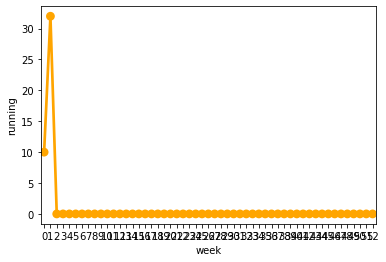

In [68]:
sns.pointplot(x='week', y='running', data=grouped, color='Orange')

In [69]:
import plotly.express as px
fig=px.bar(grouped,x='week', y='running',width=500, height=500,color='running')
fig.show()

In [70]:
import plotly.express as px
fig=px.bar(grouped,x='week', y='workout',width=500, height=500,color='workout')
fig.show()

In [71]:
fig=px.scatter(grouped,x='week', y='running_weekly_goal',width=500, height=500,color='running_weekly_goal')
fig.show()

In [72]:
fig=px.scatter(grouped,x='week', y='workout_weekly_goal',width=500, height=500,color='workout_weekly_goal')
fig.show()

In [73]:
# def create_date_table(start='2021-01-01', end='2021-12-31'):
    
#     df = pd.DataFrame({"date": pd.date_range(start, end)})
#     df["day"] = df.date.dt.day
#     df["month"] = df.date.dt.month
#     df["week"] = df.date.dt.weekofyear
#     #df["quarter"] = df.date.dt.quarter
#     df["year"] = df.date.dt.year
#     #df.insert(0, 'date_id', (df.year.astype(str) + df.month.astype(str).str.zfill(2) + df.day.astype(str).str.zfill(2)).astype(int))
#     return df
# df=create_date_table()
# df.to_csv('sports_calendar_2021.csv',index=0)